# Retail 

### Data Resources
https://archive.ics.uci.edu/ml/datasets/Online+Retail+II
### The Objective
What kinds of items should be recommend and bundle together for sales promotions according to users' previous datasets?
The Market Basket Analysis is a powerful tool for translating vast amounts of customer transaction and viewing data into simple rules for product promotion and recommendation. 

## Load data and extract data

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

In [134]:
retail=pd.read_excel('online_retail_II.xlsx')
print(retail.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


In [135]:
retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In this datasets, the Quantity column shows us the number of items that are bought in each transaction (InvoiceNo). Sometimes, the transaction gets cancelled, because this is an online retail. When there is a cancellation on a particular transaction, it will be datificated in Quantity column as a negative value. 

In [137]:
retail=retail[retail['Quantity']>=0]

To perform any machine learning model, we should handle the NaN or Null values in our datasets.

In [138]:
retail.isnull().sum()

Invoice             0
StockCode           0
Description      1101
Quantity            0
InvoiceDate         0
Price               0
Customer ID    105440
Country             0
dtype: int64

In [139]:
retail['Country'].value_counts()

United Kingdom          474938
EIRE                      9460
Germany                   7661
France                    5532
Netherlands               2730
Spain                     1235
Switzerland               1170
Portugal                  1061
Belgium                   1038
Sweden                     887
Channel Islands            821
Italy                      710
Australia                  630
Cyprus                     541
Austria                    524
Greece                     512
Denmark                    418
United Arab Emirates       399
Norway                     365
Finland                    347
Unspecified                306
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
RSA                        110
Bahrain                    106
Canada                      77
Thailand                    76
Israel                      74
Hong Kon

The distribution of country is not even. We retain the majority of the data in the country of United Kingdom

In [140]:
retail=retail[retail['Country']=='United Kingdom']

In [141]:
retail['Description']

0         15CM CHRISTMAS GLASS BALL 20 LIGHTS
1                          PINK CHERRY LIGHTS
2                         WHITE CHERRY LIGHTS
3                RECORD FRAME 7" SINGLE SIZE 
4              STRAWBERRY CERAMIC TRINKET BOX
                         ...                 
525456                   FELTCRAFT DOLL ROSIE
525457           FELTCRAFT PRINCESS LOLA DOLL
525458         FELTCRAFT PRINCESS OLIVIA DOLL
525459     PINK FLORAL FELTCRAFT SHOULDER BAG
525460                 JUMBO STORAGE BAG SUKI
Name: Description, Length: 474938, dtype: object

In [142]:
desc= pd.DataFrame(retail['Description'].value_counts())

In [143]:
desc=desc.reset_index()

In [144]:
desc

,index,Description
0,WHITE HANGING HEART T-LIGHT HOLDER,3343
1,REGENCY CAKESTAND 3 TIER,1866
2,STRAWBERRY CERAMIC TRINKET BOX,1616
3,ASSORTED COLOUR BIRD ORNAMENT,1374
4,HOME BUILDING BLOCK WORD,1338
...,...,...
4531,CAMOUFLAGE DOG COLLAR,1
4532,DOORMAT GREEN PAISLEY,1
4533,HEN PARTY BANNER TAPE,1
4534,LILAC FEATHERS CURTAIN,1


In [146]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


Keep the inovice that contain more than 2 items

In [150]:
retail_num=pd.DataFrame(retail['Invoice'].value_counts()).reset_index()

In [152]:
retail_num=retail_num[retail_num['Invoice']>1]

In [154]:
invoice_num=list(retail_num['index'])

In [155]:
invoice_num

[537434,
 538071,
 537638,
 537237,
 536876,
 536592,
 537823,
 536031,
 490074,
 491966,
 537240,
 490149,
 491969,
 490741,
 537666,
 536544,
 489857,
 513574,
 490745,
 489597,
 535835,
 491155,
 492414,
 532642,
 491970,
 492782,
 491043,
 492425,
 533338,
 491041,
 534859,
 535322,
 533348,
 503185,
 534709,
 491971,
 530850,
 535407,
 532139,
 531843,
 490963,
 534289,
 534459,
 533737,
 534319,
 489856,
 534389,
 498133,
 492303,
 532826,
 532419,
 532063,
 494918,
 531036,
 532953,
 533065,
 533740,
 531489,
 494782,
 495070,
 492783,
 531387,
 529727,
 513099,
 494814,
 492226,
 495239,
 494378,
 530060,
 494386,
 493073,
 530140,
 494016,
 493079,
 510983,
 500462,
 527520,
 504916,
 510772,
 530422,
 510519,
 494495,
 502746,
 493260,
 503823,
 500918,
 530332,
 499765,
 503426,
 494381,
 500356,
 494685,
 510637,
 494147,
 501080,
 494379,
 501161,
 525753,
 504933,
 521202,
 511522,
 494387,
 494017,
 531382,
 507235,
 525221,
 500575,
 500091,
 511051,
 529325,
 503940,
 

In [157]:
retail=retail[retail['Invoice'].isin(invoice_num)]

In [158]:
invoice=retail['Invoice'].unique()

In [159]:
libraries=[list(retail[retail['Invoice']==u].Description) for u in invoice]

In [160]:
print(libraries[0])

['15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'PINK CHERRY LIGHTS', ' WHITE CHERRY LIGHTS', 'RECORD FRAME 7" SINGLE SIZE ', 'STRAWBERRY CERAMIC TRINKET BOX', 'PINK DOUGHNUT TRINKET POT ', 'SAVE THE PLANET MUG', 'FANCY FONT HOME SWEET HOME DOORMAT']


## One-hot encoding transactions
we need to encode the basket data into a binary data that shows whether an items is bought (1) or not (0). 

In [161]:
encoder=TransactionEncoder()

In [162]:
onehot=encoder.fit(libraries)

In [163]:
onehot=onehot.transform(libraries)

In [164]:
onehot=pd.DataFrame(onehot,columns=encoder.columns_)

In [165]:
print(onehot.head())

     DOORMAT UNION JACK GUNS AND ROSES   3 STRIPEY MICE FELTCRAFT  \
0                                False                      False   
1                                False                      False   
2                                False                      False   
3                                False                      False   
4                                False                      False   

    4 PURPLE FLOCK DINNER CANDLES   ANIMAL STICKERS  \
0                           False             False   
1                           False             False   
2                           False             False   
3                           False             False   
4                           False             False   

    BLACK PIRATE TREASURE CHEST   BROWN  PIRATE TREASURE CHEST   \
0                         False                           False   
1                         False                           False   
2                         False                      

## Aprior algorithm
**Reducing the number of itemsets
** sensible
- subsets of frequent sets are frequent
- retain sets known to be frequent
- prune sets not known to be frequent
** Pruning with confidence
association_rules(frequent_itemsets,metrics='confidence',min_threshold = 0.5
min_support=0.0015
## Metric definitions
### Support
support(X)=frequency(X)/N
support(X-Y)=frequency(X&y)/N
### Confidence
confidence(X-y)=support(x-y)/support(x)
can imporve over support with additional metrics
add confidence provides a more complete picture
Support(milk&coffee)/Support(milk)
### Lift
Support(X&Y)/Support(X)*Support(Y)
lift(x-y)=support(x-y)/support(X)support(y)
** good rule is 1
### leverage
leverage(x-y)=support(x-y)-support(X)support(y)
** good rule is 0
Conviction(x-y)= support(X)support(y)/support(x-y)

In [166]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import association_rules,apriori
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets=apriori(onehot,min_support=0.01,use_colnames=True,max_len=2)
frequent_itemsets

,support,itemsets
0,0.012471,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.013562,( WHITE CHERRY LIGHTS)
2,0.014712,(10 COLOUR SPACEBOY PEN)
3,0.010402,(12 IVORY ROSE PEG PLACE SETTINGS)
4,0.011953,(12 MESSAGE CARDS WITH ENVELOPES)
...,...,...
1336,0.017470,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOODEN FR..."
1337,0.016551,"(WOODEN PICTURE FRAME WHITE FINISH, WOOD 2 DRA..."
1338,0.018735,"(WOOD S/3 CABINET ANT WHITE FINISH, WOODEN FRA..."
1339,0.015401,"(WOODEN PICTURE FRAME WHITE FINISH, WOOD S/3 C..."


In [167]:
# Generate the initial set of rules 
rules = association_rules(frequent_itemsets)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CHILDS GARDEN FORK BLUE ),(CHILDS GARDEN TROWEL BLUE ),0.010976,0.013562,0.010229,0.931937,68.714571,0.010080,14.493044
1,(CHILDS GARDEN FORK PINK),(CHILDS GARDEN TROWEL PINK),0.011838,0.014195,0.011034,0.932039,65.661570,0.010866,14.505423
2,(CHILDS GARDEN TROWEL BLUE ),(CHILDS GARDEN TROWEL PINK),0.013562,0.014195,0.011149,0.822034,57.911789,0.010956,5.539288
3,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.013677,0.019309,0.011666,0.852941,44.172707,0.011402,6.668697
4,(POPPY'S PLAYHOUSE BEDROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.016551,0.017930,0.014252,0.861111,48.026264,0.013955,7.070904
5,(POPPY'S PLAYHOUSE LIVINGROOM ),(POPPY'S PLAYHOUSE BEDROOM ),0.013562,0.016551,0.011609,0.855932,51.715543,0.011384,6.826295
6,(POPPY'S PLAYHOUSE LIVINGROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.013562,0.017930,0.012241,0.902542,50.336987,0.011998,10.076892


In [168]:
## convert antecendents and consequents into strings
rules = association_rules(frequent_itemsets)
rules['antecedents']=rules['antecedents'].apply(lambda a:','.join(list(a)))
rules['consequents']=rules['consequents'].apply(lambda a:','.join(list(a)))

In [174]:
support_table=rules.pivot(index='consequents',columns='antecedents',values='support')

In [170]:
import seaborn as sns

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

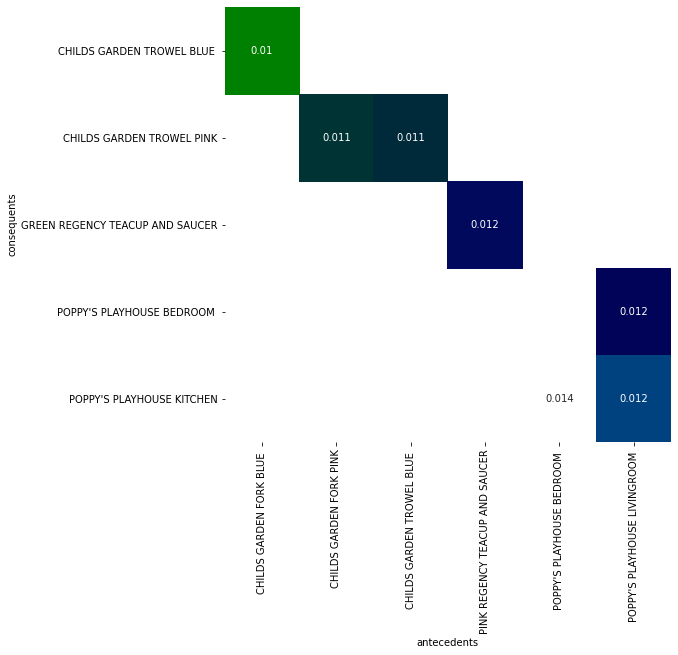

In [176]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(support_table,annot=True,cbar=False,cmap='ocean')

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

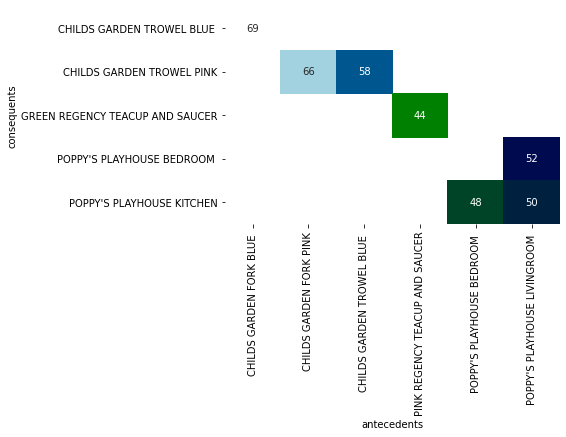

In [177]:
support_table2=rules.pivot(index='consequents',columns='antecedents',values='lift')
sns.heatmap(support_table2,annot=True,cbar=False,cmap='ocean')

In [178]:
support_table2

antecedents,CHILDS GARDEN FORK BLUE,CHILDS GARDEN FORK PINK,CHILDS GARDEN TROWEL BLUE,PINK REGENCY TEACUP AND SAUCER,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE LIVINGROOM
consequents,,,,,,
CHILDS GARDEN TROWEL BLUE,68.714571,NaN,NaN,NaN,NaN,NaN
CHILDS GARDEN TROWEL PINK,NaN,65.66157,57.911789,NaN,NaN,NaN
GREEN REGENCY TEACUP AND SAUCER,NaN,NaN,NaN,44.172707,NaN,NaN
POPPY'S PLAYHOUSE BEDROOM,NaN,NaN,NaN,NaN,NaN,51.715543
POPPY'S PLAYHOUSE KITCHEN,NaN,NaN,NaN,NaN,48.026264,50.336987


(CHILDS GARDEN TROWEL BLUE),(CHILDS GARDEN FORK BLUE) 
(CHILDS GARDEN TROWEL PINK),(CHILDS GARDEN FORK PINK )
(CHILDS GARDEN TROWEL PINK),(CHILDS GARDEN TROWEL BLUE )
(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE LIVINGROOM)
(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE LIVINGROOM)
(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER)
would make it a good combinations

## Scatterplot
identify natural threshold in data
visualize entire datasets
use finding to prune

In [179]:
frequent_itemsets=apriori(onehot,min_support=0.01,use_colnames=True,max_len=2)
rules2 = association_rules(frequent_itemsets,metric='support',min_threshold=0)

In [180]:
rules2 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3 STRIPEY MICE FELTCRAFT),(FELTCRAFT 6 FLOWER FRIENDS),0.020401,0.047641,0.010861,0.532394,11.175144,0.009890,2.036671
1,(FELTCRAFT 6 FLOWER FRIENDS),(3 STRIPEY MICE FELTCRAFT),0.047641,0.020401,0.010861,0.227986,11.175144,0.009890,1.268887
2,(6 RIBBONS RUSTIC CHARM),(REGENCY CAKESTAND 3 TIER),0.042929,0.103960,0.011379,0.265060,2.549648,0.006916,1.219203
3,(REGENCY CAKESTAND 3 TIER),(6 RIBBONS RUSTIC CHARM),0.103960,0.042929,0.011379,0.109453,2.549648,0.006916,1.074700
4,(SCANDINAVIAN REDS RIBBONS),(6 RIBBONS RUSTIC CHARM),0.025056,0.042929,0.010229,0.408257,9.510145,0.009154,1.617377
...,...,...,...,...,...,...,...,...,...
1109,(WOODEN FRAME ANTIQUE WHITE ),(WOOD S/3 CABINET ANT WHITE FINISH),0.063560,0.039883,0.018735,0.294756,7.390558,0.016200,1.361397
1110,(WOODEN PICTURE FRAME WHITE FINISH),(WOOD S/3 CABINET ANT WHITE FINISH),0.052583,0.039883,0.015401,0.292896,7.343928,0.013304,1.357816
1111,(WOOD S/3 CABINET ANT WHITE FINISH),(WOODEN PICTURE FRAME WHITE FINISH),0.039883,0.052583,0.015401,0.386167,7.343928,0.013304,1.543444
1112,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.052583,0.063560,0.034021,0.646995,10.179342,0.030679,2.652765


<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

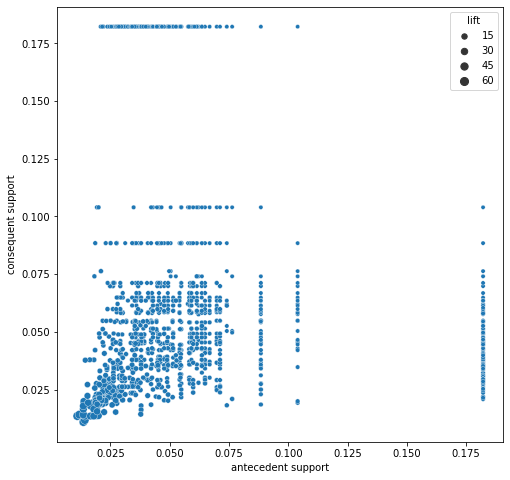

In [181]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='antecedent support',y='consequent support',size='lift',data=rules2)

## Conclusion
Good combination
(CHILDS GARDEN TROWEL BLUE),(CHILDS GARDEN FORK BLUE) 
(CHILDS GARDEN TROWEL PINK),(CHILDS GARDEN FORK PINK )
(CHILDS GARDEN TROWEL PINK),(CHILDS GARDEN TROWEL BLUE )
(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE LIVINGROOM)
(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE LIVINGROOM)
(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER)
### Item Placements. 
We could put The same kind color of forks and trowel in a set in a closer place, maybe in a same shelf or any other closer place.
### Products Bundling. 
We could different colors of  TEACUP AND SAUCER as a single bundle of product with a lower price compare to each price combined. This way will attract more sales and generates more income.
### Customer Recommendation and Discounts.
We could put Pink Regency Teacup and Saucer in the cashier, so that every time a customer bought Green Regency Teacup and Saucer, we could offer and recommend them to buy Green Regency Teacup and Saucer with a lower price.